<a href="https://colab.research.google.com/github/MEPritchard/EduPerformance/blob/main/eduperformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Data From Github orginally from Kaggle
https://www.kaggle.com/datasets/dillonmyrick/high-school-student-performance-and-demographics

In [417]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [418]:
url_math = "https://github.com/MEPritchard/EduPerformance/raw/main/student_math_clean.csv"
url_portugese = "https://github.com/MEPritchard/EduPerformance/raw/main/student_portuguese_clean.csv"

In [419]:
df1 = pd.read_csv(url_math)
df2 = pd.read_csv(url_portugese)

In [420]:
#Most of the data from df2 is repative, save grades and absences. Manually drop all columns between student_id and abscenses.
df2 = df2.drop(df2.columns[1:30], axis = 1)


In [421]:
merged_df = pd.merge(df1, df2, on='student_id')
#merged_df.describe()
merged_df.head()

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,weekend_alcohol,health,absences_x,grade_1_x,grade_2_x,final_grade_x,absences_y,grade_1_y,grade_2_y,final_grade_y
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,1,3,6,5,6,6,4,0,11,11
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,1,3,4,5,5,6,2,9,11,11
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,3,3,10,7,8,10,6,12,13,12
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,1,5,2,15,14,15,0,14,14,14
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,2,5,4,6,10,10,0,11,13,13


In [422]:
def index_unique_responses(dataframe):
    """
    Iterate through each column in a DataFrame. If the data type of the column is object,
    it lists unique values and indexes each unique response from 1 to n.

    Returns:
    - DataFrame with unique responses indexed from 1 to n for object-type columns
    """
    def index_column(column):
        unique_values = column.unique()
        mapping = {value: index+1 for index, value in enumerate(unique_values)}
        return column.map(mapping)

    indexed_dataframe = dataframe.copy()
    for column in indexed_dataframe.columns:
        if indexed_dataframe[column].dtype == 'object':
            indexed_dataframe[column] = index_column(indexed_dataframe[column])
    return indexed_dataframe

In [428]:
int_df=index_unique_responses(data_df.drop(columns=['student_id']))
int_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   school                 394 non-null    int64
 1   sex                    394 non-null    int64
 2   age                    394 non-null    int64
 3   address_type           394 non-null    int64
 4   family_size            394 non-null    int64
 5   parent_status          394 non-null    int64
 6   mother_education       394 non-null    int64
 7   father_education       394 non-null    int64
 8   mother_job             394 non-null    int64
 9   father_job             394 non-null    int64
 10  school_choice_reason   394 non-null    int64
 11  guardian               394 non-null    int64
 12  travel_time            394 non-null    int64
 13  study_time             394 non-null    int64
 14  class_failures         394 non-null    int64
 15  school_support         394 non-null    i

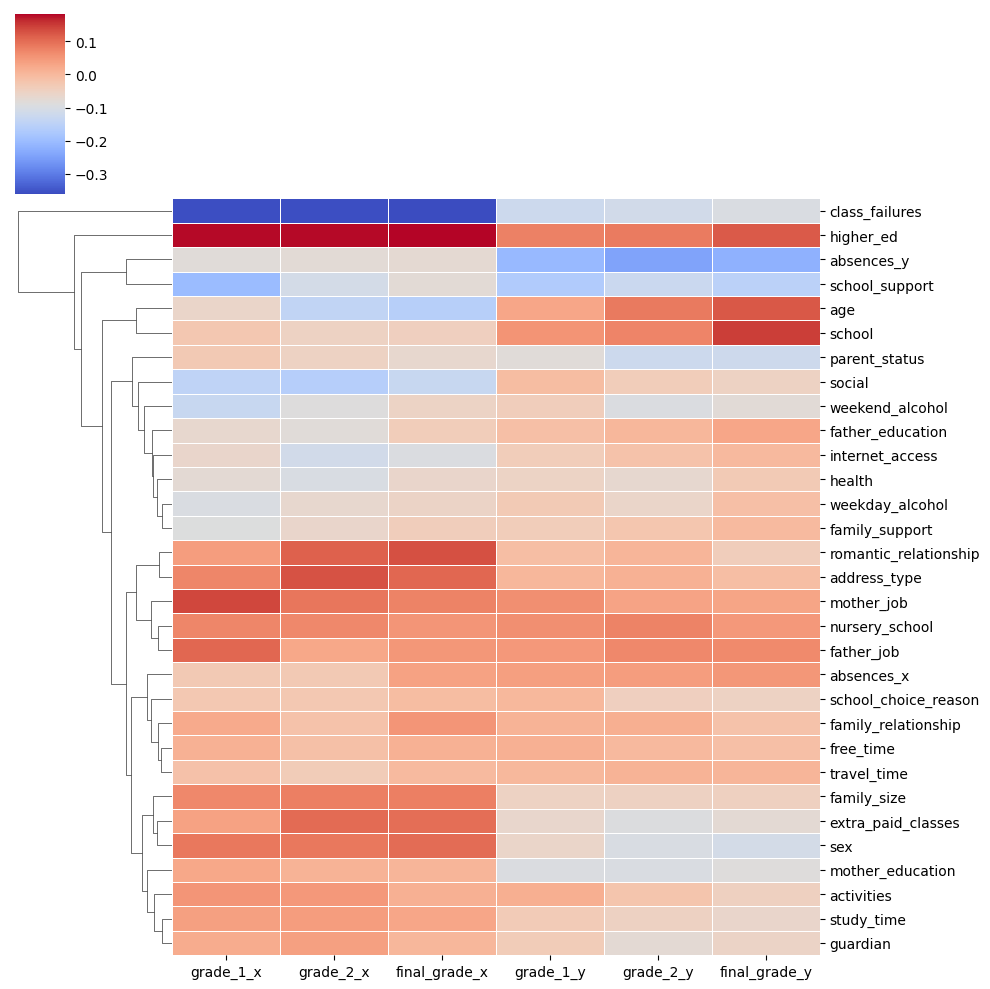

In [433]:
df = pd.DataFrame(int_df).corr()

# Select the last 6 columns for the y-axis and the first 28 columns for the x-axis
df_clustermap = df.iloc[:, :31]

# Create the clustermap
sns.clustermap(df_clustermap.T.iloc[::-1, -6:], row_cluster=True, col_cluster=False, cmap='coolwarm',linewidths=.5)

plt.show()